In [1]:
import os

# Define the directory for images
image_dir = "/content/images/"
os.makedirs(image_dir, exist_ok=True)

print(f"Directory created at: {image_dir}")

from google.colab import files

print("Please upload your images:")
uploaded = files.upload()  # Manually upload images

# Move uploaded images to the directory
for filename in uploaded.keys():
    os.rename(filename, os.path.join(image_dir, filename))

print(f"Images uploaded to: {image_dir}")


Directory created at: /content/images/
Please upload your images:


Saving child 3.jpg to child 3.jpg
Saving child 4.jpg to child 4.jpg
Saving child 5.jpg to child 5.jpg
Images uploaded to: /content/images/


In [2]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 106.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 82.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 92.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling


0: 448x640 1 person, 165.4ms
Speed: 6.5ms preprocess, 165.4ms inference, 3.0ms postprocess per image at shape (1, 3, 448, 640)
Processed: child 5.jpg


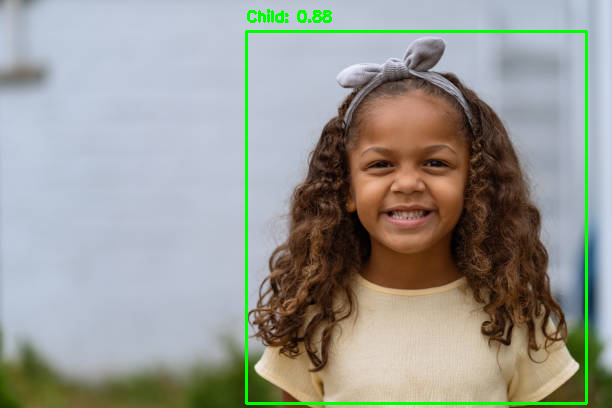


0: 384x640 1 person, 154.2ms
Speed: 3.6ms preprocess, 154.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
Processed: child 4.jpg


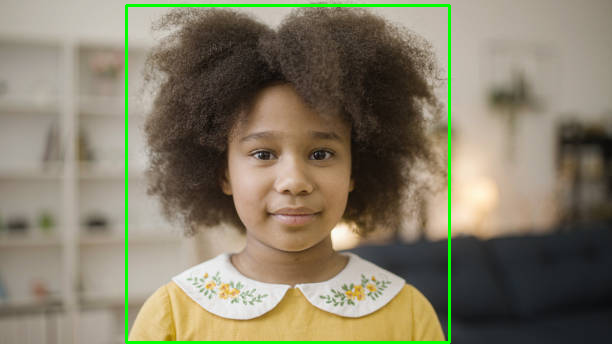


0: 640x512 1 person, 202.3ms
Speed: 6.6ms preprocess, 202.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 512)
Processed: child 3.jpg


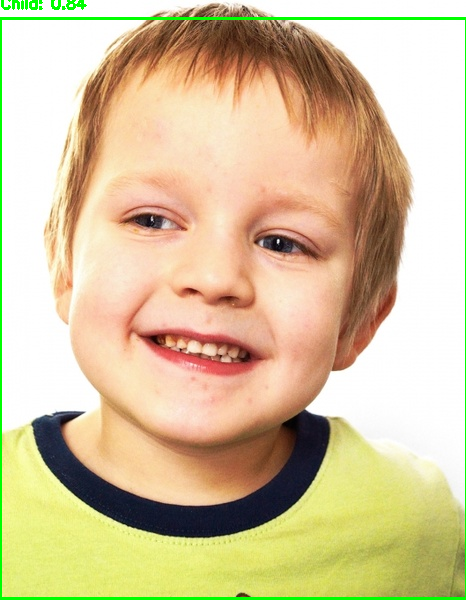

Processed images are saved in: /content/output_images/
Annotations are saved in: /content/annotations/


In [4]:
from ultralytics import YOLO
import cv2
import os
from google.colab.patches import cv2_imshow


model = YOLO("yolov8n.pt")

# Directory containing images
image_dir = "/content/images/"
output_dir = "/content/output_images/"
os.makedirs(output_dir, exist_ok=True)

# Annotation directory
annotation_dir = "/content/annotations/"
os.makedirs(annotation_dir, exist_ok=True)

# Process each image in the directory
for image_name in os.listdir(image_dir):
    image_path = os.path.join(image_dir, image_name)

    # Ensure the file is an image
    if not (image_path.endswith(".jpg") or image_path.endswith(".jpeg") or image_path.endswith(".png") or image_path.endswith(".jfif")):
        continue

    # Load the image
    image = cv2.imread(image_path)

    # Run inference
    results = model(image, classes=[0])  # "classes=[0]" filters for the "person" class in COCO dataset

    # Prepare annotation file
    file_name, file_extension = os.path.splitext(image_name)
    annotation_path = os.path.join(annotation_dir, f"{file_name}.txt")

    with open(annotation_path, "w") as annotation_file:
        # Process and visualize results
        for result in results[0].boxes:
            box = result.xyxy[0]
            conf = result.conf[0]
            class_id = result.cls[0]

            # Draw bounding box and label
            x_min, y_min, x_max, y_max = map(int, box)
            label = f"Child: {conf:.2f}"
            cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
            cv2.putText(image, label, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

            # Write annotation in YOLO format
            image_height, image_width = image.shape[:2]
            x_center = (x_min + x_max) / 2 / image_width
            y_center = (y_min + y_max) / 2 / image_height
            width = (x_max - x_min) / image_width
            height = (y_max - y_min) / image_height
            annotation_file.write(f"{int(class_id)} {x_center} {y_center} {width} {height}\n")

    # Ensure the output path has a valid extension
    if file_extension.lower() not in ['.jpg', '.jpeg', '.png']:
        file_extension = '.jpg'  # Default to .jpg if the extension is invalid
    output_path = os.path.join(output_dir, f"{file_name}{file_extension}")

    # Save the annotated image
    cv2.imwrite(output_path, image)

    # Display the image (optional, for verification)
    print(f"Processed: {image_name}")
    cv2_imshow(image)

print(f"Processed images are saved in: {output_dir}")
print(f"Annotations are saved in: {annotation_dir}")
